In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
df = pd.read_csv("data/results.csv", delimiter=";")

In [32]:
df_cleaned = df.drop('test_id', axis=1)
aggregated_df = df_cleaned.groupby(['n_steps', 'n_vertices', 'n_customers'], as_index=False)['execution_time_in_seconds'].mean()
aggregated_df.rename(columns={'execution_time_in_seconds': 'average_execution_time'}, inplace=True)

In [33]:
aggregated_df

,n_steps,n_vertices,n_customers,average_execution_time
0,10,20,2,0.034576
1,10,20,3,0.036889
2,10,20,5,0.031948
3,10,50,2,0.045547
4,10,100,2,0.093036
5,20,50,2,0.849980
6,20,50,3,0.370691
7,20,50,5,1.349901
8,20,100,2,1.364511
9,20,100,3,1.677892


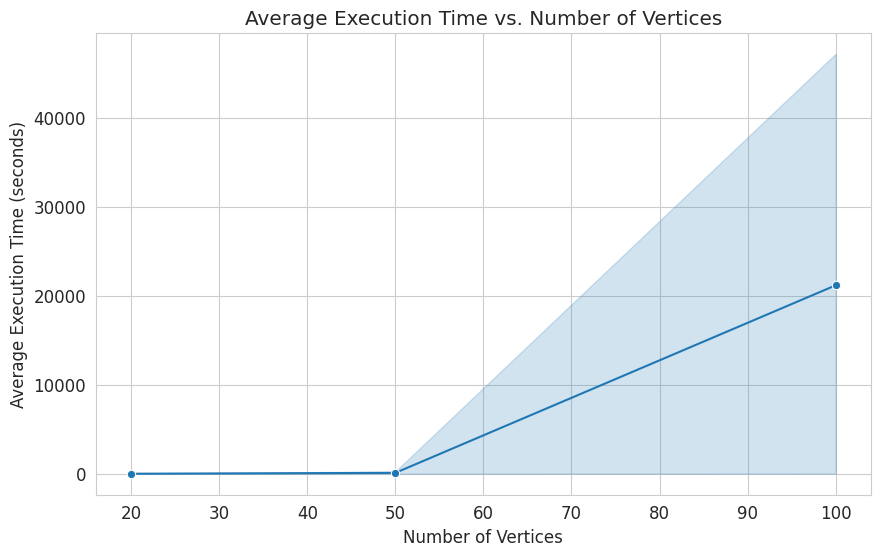

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_df, x='n_vertices', y='average_execution_time', marker='o')
plt.title('Average Execution Time vs. Number of Vertices')
plt.xlabel('Number of Vertices')
plt.ylabel('Average Execution Time (seconds)')
plt.grid(True)
plt.show()


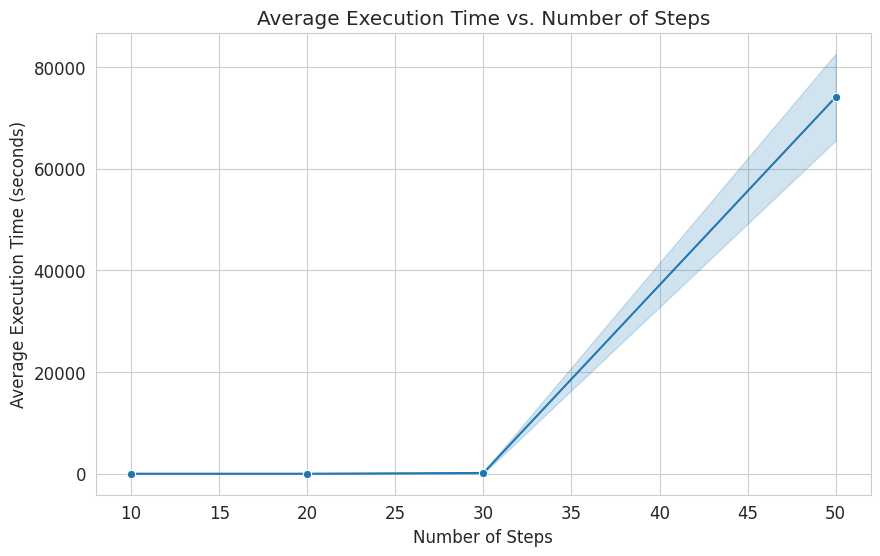

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_df, x='n_steps', y='average_execution_time', marker='o')
plt.title('Average Execution Time vs. Number of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Average Execution Time (seconds)')
plt.grid(True)
plt.show()

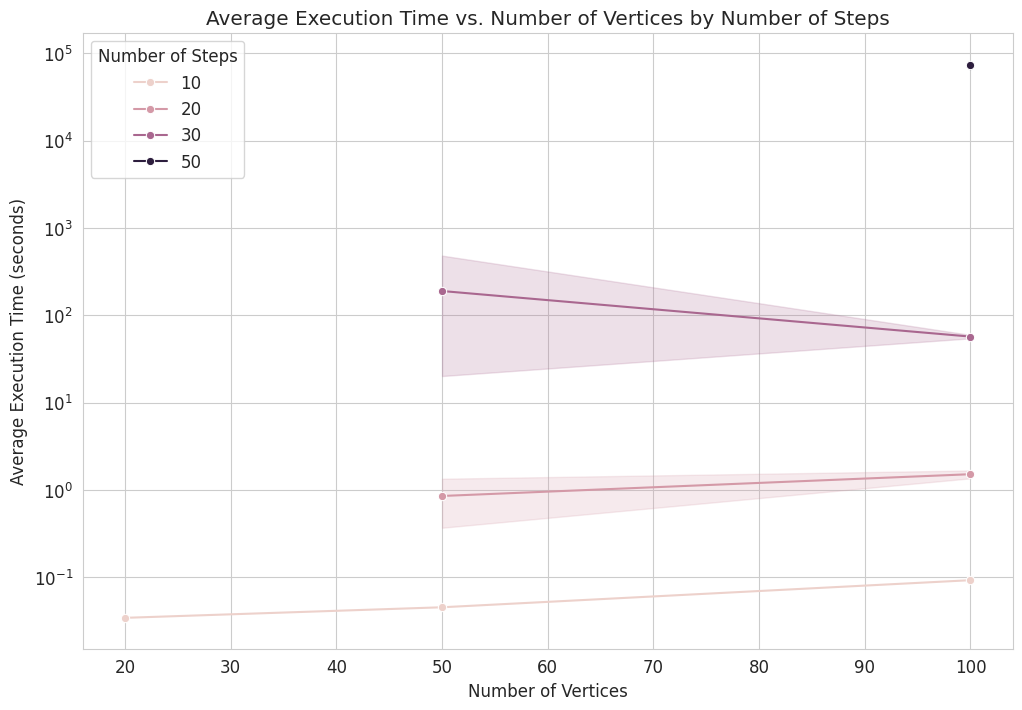

In [36]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=aggregated_df,
    x='n_vertices',
    y='average_execution_time',
    hue='n_steps',
    marker
    ='o'
)
plt.yscale('log')
plt.title('Average Execution Time vs. Number of Vertices by Number of Steps')
plt.xlabel('Number of Vertices')
plt.ylabel('Average Execution Time (seconds)')
plt.legend(title='Number of Steps')
plt.grid(True)
plt.show()


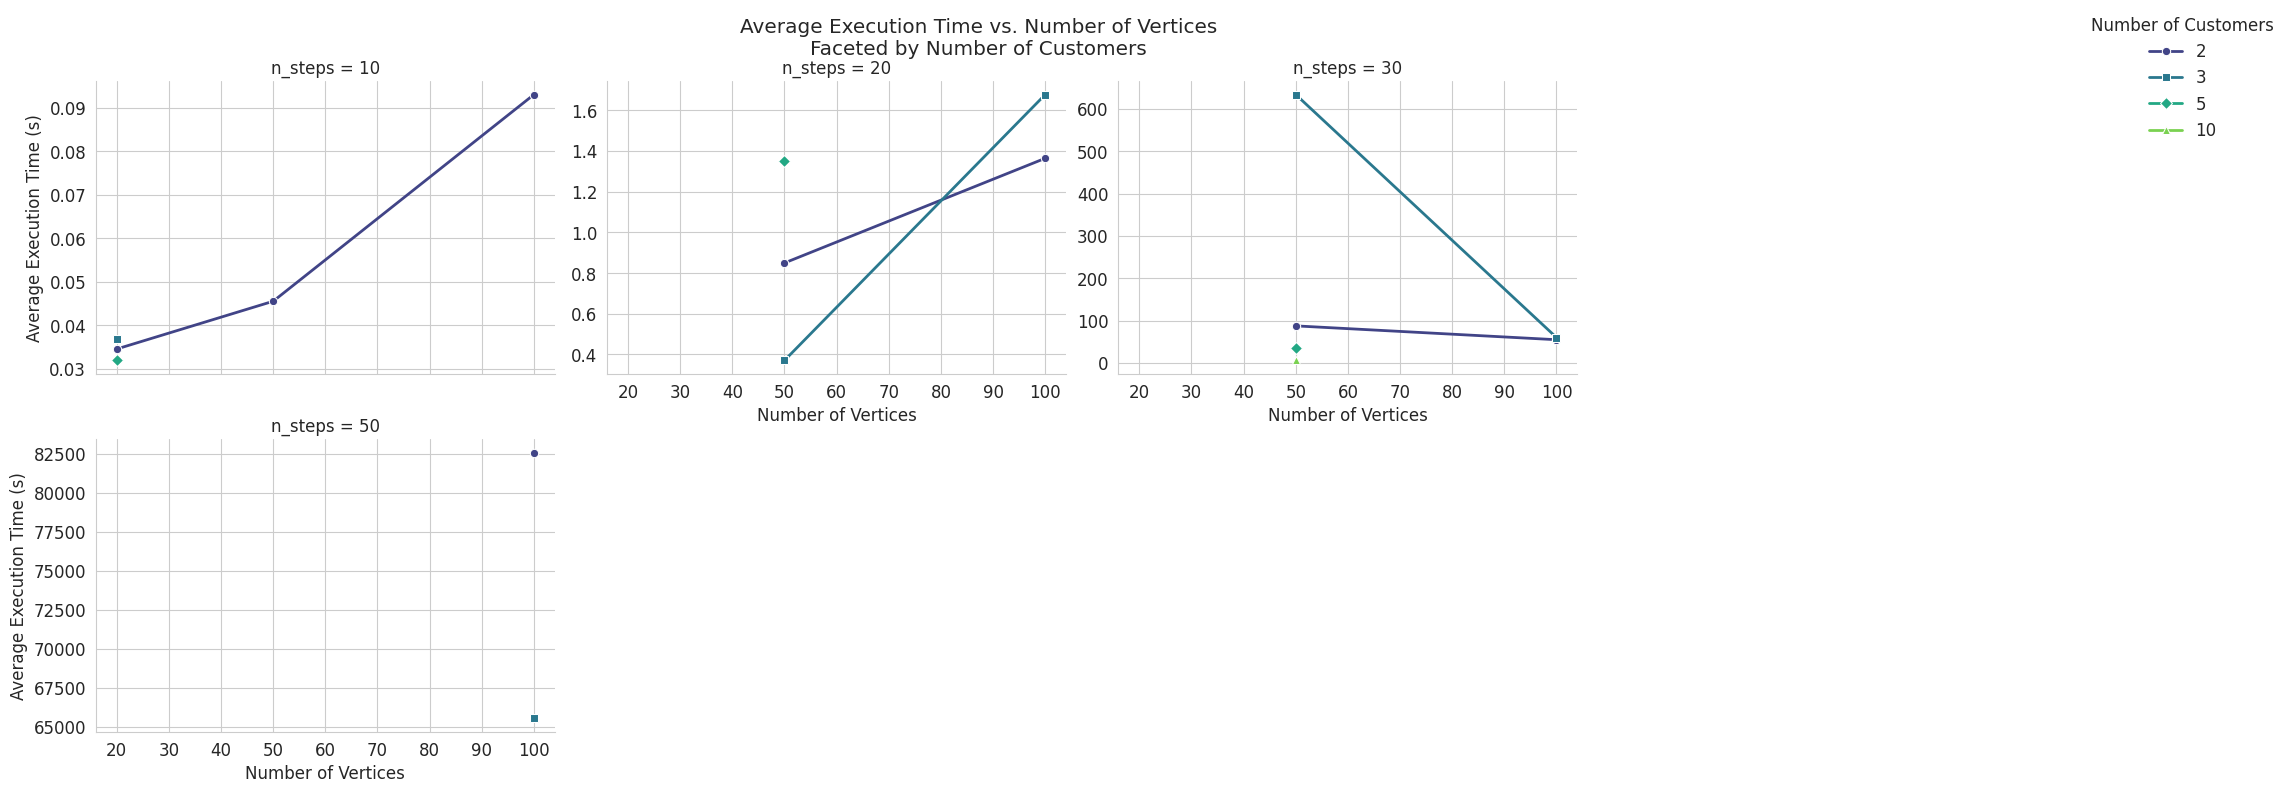

In [37]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})  # Adjust font size as needed

# Define color palette and markers
unique_steps = aggregated_df['n_customers'].nunique()
palette = sns.color_palette("viridis", n_colors=unique_steps)
markers = ["o", "s", "D", "^", "v", "<", ">", "P", "X", "*"]  # Extend based on unique_steps

# Initialize the FacetGrid object
g = sns.FacetGrid(
    data=aggregated_df,
    col="n_steps",
    hue="n_customers",
    palette=palette,
    col_wrap=3,
    height=4,
    aspect=1.5,
    sharey=False
)

# Map the lineplot onto the FacetGrid
g = g.map(
    sns.lineplot,
    "n_vertices",
    "average_execution_time",
    marker="o",
    linewidth=2
)

# Assign different markers to different lines
for ax in g.axes.flat:
    lines = ax.get_lines()
    for i, line in enumerate(lines):
        if i < len(markers):
            line.set_marker(markers[i])
        else:
            line.set_marker("o")  # Default marker if not enough unique markers

# Add legends outside the plot
g.add_legend(title="Number of Customers", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set facet titles and axis labels
g.set_titles("n_steps = {col_name}")
g.set_axis_labels("Number of Vertices", "Average Execution Time (s)")

# Add main title
plt.subplots_adjust(top=0.9, right=0.8)  # Adjust right to make space for the legend
g.fig.suptitle("Average Execution Time vs. Number of Vertices\nFaceted by Number of Customers")

# Optionally, use a log scale for y-axis if necessary
# for ax in g.axes.flat:
#     ax.set_yscale('log')

plt.show()